In [1]:
import anndata
import pandas as pd
import scanpy as sc
import sklearn
import statsmodels.api as sm
import numpy as np
import math
import anndata as ad

annData = sc.read_h5ad("PapalexiSatija2021_eccite_arrayed_RNA.h5ad")
# this dataset is about UPR(unfolded protein responce)
#dir(annData)

In [2]:
dir(annData)

['T',
 'X',
 '_BACKED_ATTRS',
 '_H5_ALIASES',
 '_H5_ALIASES_NAMES',
 '_X',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adata_ref',
 '_check_dimensions',
 '_check_uniqueness',
 '_clean_up_old_format',
 '_gen_repr',
 '_get_X',
 '_get_and_delete_multicol_field',
 '_get_obs_array',
 '_get_var_array',
 '_has_X',
 '_init_as_actual',
 '_init_as_view',
 '_inplace_subset_obs',
 '_inplace_subset_var',
 '_is_view',
 '_layers',
 '_mutated_copy',
 '_n_obs',
 '_n_vars',
 '_normalize_indices',
 '_obs',
 '_obsm',
 '_obsp',
 '_oidx',
 '_prep_dim_index',
 '_raw',
 '_remove_unused_categories',
 '_sanitize'

In [3]:
annData.obs

,perturbation,hto,guide_id,hto_barcode,gdo_barcode,tissue_type,cell_line,cancer,disease,perturbation_type,celltype,organism,nperts,ngenes,ncounts,percent_mito,percent_ribo
AAACCTGAGAGTACAT,STAT2,HTO-STAT2g1,STAT2g1,TATCACATCGGT,CATTACCAGTTGCTCACTG,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2635,7453.0,3.542198,23.104790
AAACCTGTCAGCTCGG,STAT2,HTO-STAT2g1,STAT2g1,TATCACATCGGT,CATTACCAGTTGCTCACTG,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3192,10938.0,4.086670,21.640154
AAACGGGGTCTCAACA,STAT2,HTO-STAT2g1,STAT2g1,TATCACATCGGT,CATTACCAGTTGCTCACTG,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2899,10403.0,3.941171,18.610016
AAACGGGGTTGCGCAC,STAT2,HTO-STAT2g1,STAT2g1,TATCACATCGGT,CATTACCAGTTGCTCACTG,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3044,10332.0,2.884243,22.406117
AAACGGGTCAGCTCGG,STAT2,HTO-STAT2g1,STAT2g1,TATCACATCGGT,CATTACCAGTTGCTCACTG,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2932,8883.0,4.154002,22.413599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTCGACTGC,IRF1,HTO-IRF1g1,IRF1g1,TAACGACGTGGT,TGTCTATGGAGACTTTAGC,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2659,7342.0,2.655952,20.021792
TTTGGTTGTCGCATAT,IRF1,HTO-IRF1g1,IRF1g1,TAACGACGTGGT,TGTCTATGGAGACTTTAGC,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2636,7411.0,4.021050,17.420051
TTTGGTTTCATAAAGG,IRF1,HTO-IRF1g1,IRF1g1,TAACGACGTGGT,TGTCTATGGAGACTTTAGC,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3305,8778.0,3.782183,19.742538
TTTGTCACACCGTTGG,IRF1,HTO-IRF1g1,IRF1g1,TAACGACGTGGT,TGTCTATGGAGACTTTAGC,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2284,6015.0,3.308396,17.988362


In [4]:
annData.var

,ensembl_id,ncounts,ncells
gene_symbol,,,
AL627309.1,AL627309.1,36.0,36
AP006222.2,AP006222.2,163.0,160
RP4-669L17.10,RP4-669L17.10,21.0,21
RP11-206L10.3,RP11-206L10.3,64.0,64
RP11-206L10.2,RP11-206L10.2,87.0,86
...,...,...,...
RP4-539M6.22,RP4-539M6.22,4.0,4
INPP5J,ENSG00000185133,2.0,2
RP3-508I15.18,RP3-508I15.18,3.0,3


control     2009
ETV7        1789
IRF1         994
ATF2         794
IRF7         750
MARCH8       723
IFNGR1       701
STAT2        576
CAV1         409
PDL1         235
IFNGR2         4
STAT5A         0
SPI1           0
STAT3          0
TNFRSF14       0
UBE2L6         0
STAT1          0
NFKBIA         0
SMAD4          0
POU2F2         0
PDCD1LG2       0
BRD4           0
JAK2           0
CUL3           0
CMTM6          0
CD86           0
eGFP           0
Name: perturbation, dtype: int64


(array([2009.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6975.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

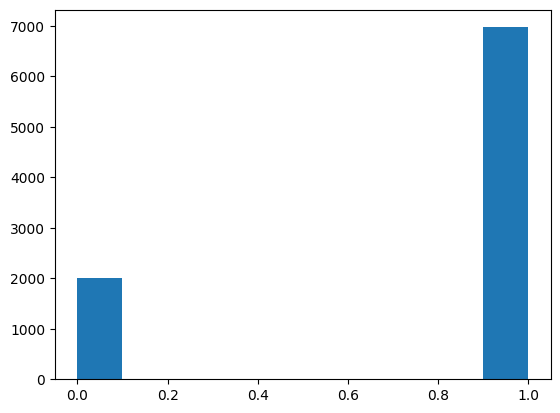

In [5]:
perturb_labels_count = annData.obs['perturbation'].value_counts()
print(perturb_labels_count)

import matplotlib.pyplot as plt
plt.hist( annData.obs['nperts'])

In [6]:
annData.X.todense()
#convert the sparse matrix into a dense one
X=pd.DataFrame(annData.X.todense()) 
#obtain the data frame
cell_name=annData.obs.index
chr_name=annData.var.index
X.index=cell_name
X.columns=chr_name
X=X.T #let the rows represent gene symbol and the columns represent cell with a barcode
print(X)

               AAACCTGAGAGTACAT  AAACCTGTCAGCTCGG  AAACGGGGTCTCAACA  \
gene_symbol                                                           
AL627309.1                  0.0               0.0               0.0   
AP006222.2                  0.0               0.0               0.0   
RP4-669L17.10               0.0               0.0               0.0   
RP11-206L10.3               0.0               0.0               0.0   
RP11-206L10.2               0.0               0.0               0.0   
...                         ...               ...               ...   
RP4-539M6.22                0.0               0.0               0.0   
INPP5J                      0.0               0.0               0.0   
RP3-508I15.18               0.0               0.0               0.0   
CTA-217C2.2                 0.0               0.0               0.0   
AP001065.2                  0.0               0.0               0.0   

               AAACGGGGTTGCGCAC  AAACGGGTCAGCTCGG  AAAGATGAGCTTTGGT  \
gene_

In [8]:
subset = ['STAT2','ETV7','IRF1','ATF2','IRF7','MARCH8','IFNGR1','CAV1','IFNGR2',
'STAT5A','SPI1','STAT3','TNFRSF14','UBE2L6','STAT1','NFKBIA','SMAD4','POU2F2','PDCD1LG2','BRD4', 'JAK2',
'CUL3','CMTM6','CD86','eGFP',          
'JAK2',
'STAT1',
'SMAD4',
'BRD4',
'SPI1',
'CUL3',
'MYC',
'CD86',
'CMTM6',
'NFKBIA',
'PDCD1LG2',
'STAT3',
'STAT5A',
'TNFRSF14',
'UBE2L6',
'KIT','FLT3','GRB2','HRAS','KRAS','NRAS','STAT5B',
'IKBKB','IKBKG','NFKB1','RELA','BAD','MTOR','EIF4EBP1','BRAF','RAF1','ARAF','MAP2K1','MAP2K2',
'PIM1','PIM2','RUNX1','CSF1R','MPO','CEBPA','PER2','SPI1','CSF1R','RUNX1T1','CD14','ITGAM',
'FCGR1A','RARA','PML','CEBPE','BCL2A1','DUSP6','JUP','TCF7','TCF7L1','TCF7L2','LEF1','CCND1']
#STAT2,ETV7,...eGFP represents the perturbation genes, JAK2,STST1,...UBE2L6 represent the IFN genes
#KIT,...CCND1 represents the AML genes
subset = list(set(subset))
sub_df = (X.loc[subset, :])
sub_df.loc['sequencing_depth'] = X.apply(lambda x:x.sum(),axis=0)
print(sub_df)

                  AAACCTGAGAGTACAT  AAACCTGTCAGCTCGG  AAACGGGGTCTCAACA  \
gene_symbol                                                              
JAK2                           1.0               2.0               1.0   
PDCD1LG2                       0.0               0.0               0.0   
PIM1                           2.0               0.0               0.0   
FCGR1A                         0.0               0.0               8.0   
PML                            0.0               1.0               0.0   
...                            ...               ...               ...   
CEBPA                          1.0               3.0               0.0   
IKBKB                          1.0               1.0               0.0   
CUL3                           1.0               1.0               0.0   
SMAD4                          0.0               0.0               0.0   
sequencing_depth            7453.0           10938.0           10403.0   

                  AAACGGGGTTGCGCAC  A

In [13]:
#the minimal value of sequencing_depth is 1975,so there is no need to drop the data of some cells
#To delete the genes which express in few cells ,firstly compute the number of zeros in each row
sums = (sub_df == 0).astype(int).sum(axis=1)
# acquire the index of the rows need deleting
sums_result = list(sums[sums >sub_df.shape[1]*0.4].index)
#drop these rows
df = sub_df.drop(sums_result, axis=0)
print(df)
cells = df.columns
genes = df.index

                  AAACCTGAGAGTACAT  AAACCTGTCAGCTCGG  AAACGGGGTCTCAACA  \
gene_symbol                                                              
FCGR1A                         0.0               0.0               8.0   
UBE2L6                         6.0               9.0               8.0   
EIF4EBP1                       1.0               3.0               8.0   
IRF1                           5.0              10.0              22.0   
SPI1                           0.0               1.0               3.0   
CMTM6                          2.0               2.0               4.0   
IFNGR2                         1.0               1.0               3.0   
GRB2                           4.0               2.0               6.0   
STAT1                          7.0              14.0               5.0   
CEBPA                          1.0               3.0               0.0   
sequencing_depth            7453.0           10938.0           10403.0   

                  AAACGGGGTTGCGCAC  A

In [10]:
sums1 = (X == 0).astype(int).sum(axis=1)
# acquire the index of the rows need deleting
sums_result1 = list(sums1[sums1 >X.shape[1]*0.1].index)
#drop these rows
df1 = X.drop(sums_result1, axis=0)
print(df1)

             AAACCTGAGAGTACAT  AAACCTGTCAGCTCGG  AAACGGGGTCTCAACA  \
gene_symbol                                                         
RPL22                    10.0              20.0              13.0   
ENO1                      2.0               4.0               9.0   
RPL11                    27.0              40.0              36.0   
SH3BGRL3                  9.0              40.0              14.0   
HMGN2                    26.0              24.0              34.0   
...                       ...               ...               ...   
MT-ND3                    9.0              17.0              16.0   
MT-ND4L                  14.0              23.0              37.0   
MT-ND4                   12.0              32.0              22.0   
MT-ND5                    8.0               8.0              13.0   
MT-CYB                   12.0              35.0              25.0   

             AAACGGGGTTGCGCAC  AAACGGGTCAGCTCGG  AAAGATGAGCTTTGGT  \
gene_symbol                      

In [14]:
sequencing_depth = (df.loc['sequencing_depth', :])
y = df[0:1]
y = y.T
def func(x):
    return math.log(x)

def func1(x):
    return math.log(x+1)

def func2(x):
    return math.log(x+1.5)

def func3(x):
    return math.sqrt(x+1)+math.sqrt(x)

y = y.applymap(func3)
sequencing_depth = pd.DataFrame(sequencing_depth)
x = sequencing_depth.applymap(func)
#x represents the log(sequencing_depth) data
model = sm.GLM(y,x,family=sm.families.Poisson())
#use the log(sequencing_depth) as the intercept of Poisson regression
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 FCGR1A   No. Observations:                 8984
Model:                            GLM   Df Residuals:                     8983
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14614.
Date:                Tue, 29 Aug 2023   Deviance:                       5233.7
Time:                        10:50:19   Pearson chi2:                 5.00e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04376
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sequencing_depth     0.1011      0.001  

                         0
AAACCTGAGAGTACAT -0.594117
AAACCTGTCAGCTCGG -0.609562
AAACGGGGTCTCAACA  1.287211
AAACGGGGTTGCGCAC -0.051950
AAACGGGTCAGCTCGG -0.601258
...                    ...
TTTGGTTGTCGACTGC  0.721959
TTTGGTTGTCGCATAT -0.593885
TTTGGTTTCATAAAGG  0.256058
TTTGTCACACCGTTGG  0.305001
TTTGTCAGTGCAACTT -0.560353

[8984 rows x 1 columns]


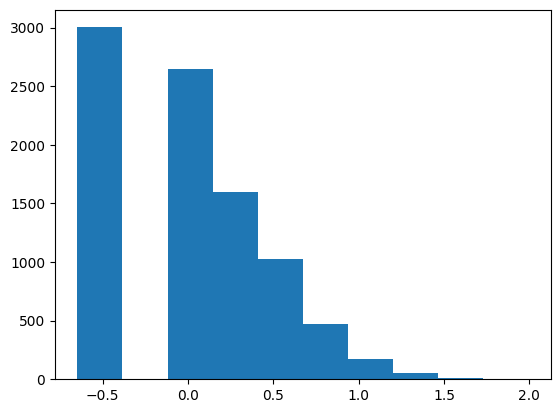

In [15]:
resid = results.resid_working
resid = pd.DataFrame(resid)
print(resid)
import matplotlib.pyplot as plt
import numpy as np

plt.hist(resid)
working_residuals = resid
#working_residual is a dataframe storing thr working residual data
working_residuals.columns = [genes[0]]

In [16]:
#perform poisson regression for each gene/protein
for i in range(1,df.shape[0]-1):
    y = df[i:i+1].T
    y = y.applymap(func3)
    model = sm.GLM(y,x,family=sm.families.Poisson())
    results = model.fit()
    #print(results.summary())
    resid=results.resid_working
    resid = pd.DataFrame(resid)
    resid.columns = [genes[i]]
    val = pd.concat([working_residuals,resid],axis = 1)
    working_residuals = val

Text(0.5, 1.0, 'STAT1')

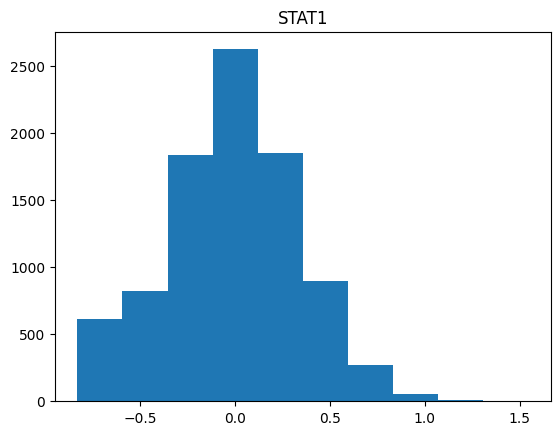

In [28]:
i = 8
plt.hist(working_residuals[genes[i]])
plt.title(genes[i])

In [50]:
#working_residuals.to_csv('D:/SummerIntern/Datasets/AdamsonWeissman2016_GSM2406675_10X001_working_residuals.csv',sep='\t') 
wr_csv_data = working_residuals.to_csv('D:/SummerIntern/Datasets/PapalexiSatija2021_eccite_arrayed_RNA_working_residuals.csv', index = True)
print('\nCSV String:\n', wr_csv_data)


CSV String:
 None


In [29]:
Z = pd.DataFrame(annData.obs['perturbation'])
Target_genes = list(Z['perturbation'].unique())
Target_genes

['STAT2',
 'IRF7',
 'MARCH8',
 'ATF2',
 'IFNGR2',
 'CAV1',
 'IFNGR1',
 'ETV7',
 'control',
 'PDL1',
 'IRF1']

In [30]:
selected_subset = working_residuals.columns
Perturb_subset = list(selected_subset & Target_genes)
Perturb_subset

C:\Users\Eurus2003\AppData\Local\Temp\ipykernel_16932\610076480.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  Perturb_subset = list(selected_subset & Target_genes)


['IRF1', 'IFNGR2']

In [31]:
wr_csv_data2 = Z.to_csv('D:/SummerIntern/Datasets/PapalexiSatija2021_eccite_arrayed_RNA_perturbation_information.csv', index = True)
print('\nCSV String:\n', wr_csv_data2)


CSV String:
 None
